<a href="https://colab.research.google.com/github/JordanDSIA/2025_UTEC_PROGRAMACION_101/blob/main/Proyecto_Final_IA_Fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================================================================
# Celda 1: Instalación de Librerías
# ==============================================================================
print("1. Instalando librerías necesarias...")
!pip install pandas networkx geopy shapely
print("Librerías instaladas.")

In [5]:
# --- Configuración para mostrar todas las columnas seguidas ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


3. Creando el dataset de ciclovías simulado con coordenadas y riesgo...
Dataset de ciclovías simulado guardado en: data/ciclovias_lima_simulado.csv

Primeras 5 filas del dataset de ciclovías simulado:
  DEPARTAMEN PROVINCIA DISTRITO  UBIGEO CANTIDAD                NOMBRE_CICLOVIA                                      TRAMO     DISTRITO_CICLOVIA      TIPO_VIA  START_LAT  START_LON    END_LAT    END_LON  RISK_SCORE  LENGTH_KM
0       LIMA      LIMA     LIMA  150101     C-01  Ciclovía Av. Carlos Izaguirre     Entre Av. Universitaria y Av. Palmeras            LOS OLIVOS  METROPOLITAN -12.070000 -77.030000 -12.065853 -77.025501           2   0.671104
1       LIMA      LIMA     LIMA  150101     C-01  Ciclovía Av. Carlos Izaguirre           Entre Av. Palmeras y Av. Antares         INDEPENDENCIA  METROPOLITAN -12.065853 -77.025501 -12.063673 -77.022611           1   0.396403
2       LIMA      LIMA     LIMA  150101     C-02        Ciclovía Av. Los Alisos     Entre Av. Las Palmeras y Av. Tantama

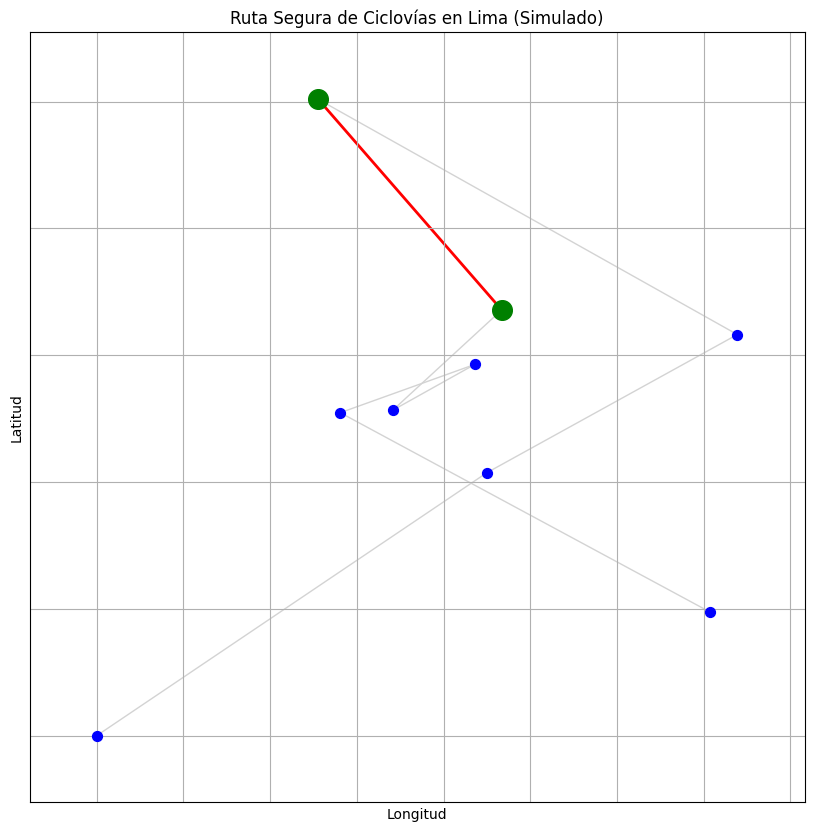


--- Proceso Completado ---


In [6]:
# ==============================================================================
# Celda 2: Montar Google Drive (Recomendado para persistencia de datos)
# ==============================================================================
# print("\n2. Montando Google Drive (autorice el acceso)...")
# from google.colab import drive
# drive.mount('/content/drive')
# print("Google Drive montado. Acceso en /content/drive/MyDrive/")

# Define la ruta base en tu Drive donde quieres almacenar los archivos del proyecto.
# ¡IMPORTANTE! Crea esta carpeta en tu Google Drive antes de ejecutar.
# Por ejemplo: "mi_proyecto_ciclovias" en la raíz de "Mi unidad".
PROJECT_PATH = '/content/drive/MyDrive/tu_carpeta_proyecto_ciclovias/'

# Crear la carpeta del proyecto si no existe
# !mkdir -p "$PROJECT_PATH"
# # Navegar al directorio del proyecto para que las rutas relativas funcionen
# %cd "$PROJECT_PATH"
# print(f"Directorio de trabajo establecido en: {PROJECT_PATH}")

# ==============================================================================
# Celda 3: Crear el Dataset de Ciclovías (Simulado con Coordenadas y Riesgo)
# Si ya tienes tu CSV con coordenadas, puedes omitir esta celda y subirlo directamente.
# ==============================================================================
print("\n3. Creando el dataset de ciclovías simulado con coordenadas y riesgo...")
import pandas as pd
import numpy as np

# Datos base de tu imagen (ejemplo, expande con tus datos reales)
data = {
    'DEPARTAMEN': ['LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA'],
    'PROVINCIA': ['LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA'],
    'DISTRITO': ['LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA', 'LIMA'],
    'UBIGEO': ['150101', '150101', '150101', '150101', '150101', '150101', '150101', '150101'],
    'CANTIDAD': ['C-01', 'C-01', 'C-02', 'C-03', 'C-04', 'C-05', 'C-06', 'C-07'],
    'NOMBRE_CICLOVIA': [
        'Ciclovía Av. Carlos Izaguirre', 'Ciclovía Av. Carlos Izaguirre',
        'Ciclovía Av. Los Alisos', 'Ciclovía Av. Los Alisos',
        'Ciclovía Av. Alfredo Mendiola', 'Ciclovía Av. Alfredo Mendiola',
        'Ciclovía Av. Tupac Amaru', 'Ciclovía Av. Tupac Amaru'
    ],
    'TRAMO': [
        'Entre Av. Universitaria y Av. Palmeras', 'Entre Av. Palmeras y Av. Antares',
        'Entre Av. Las Palmeras y Av. Tantamayo', 'Entre Av. Tantamayo y Av. Marañon',
        'Entre Av. Carlos Izaguirre y Av. Naranjal', 'Entre Av. Naranjal y Av. Los Alisos',
        'Entre Av. Izaguirre y Av. El Sol', 'Entre Av. El Sol y Av. Chimpu Ocllo'
    ],
    'DISTRITO_CICLOVIA': [
        'LOS OLIVOS', 'INDEPENDENCIA', 'LOS OLIVOS', 'SAN MARTIN DE PORRES',
        'LOS OLIVOS', 'INDEPENDENCIA', 'COMAS', 'CARABAYLLO'
    ],
    'TIPO_VIA': [
        'METROPOLITAN', 'METROPOLITAN', 'METROPOLITAN', 'METROPOLITAN',
        'METROPOLITAN', 'METROPOLITAN', 'METROPOLITAN', 'METROPOLITAN'
    ]
}

df_ciclovias = pd.DataFrame(data)

# Simular coordenadas para cada tramo (ESTO ES CLAVE SI TU CSV ORIGINAL NO LAS TIENE)
# Generaremos coordenadas que se "conecten" para formar una red
start_lat = -12.0700 # Latitud inicial cercana a Lima
start_lon = -77.0300 # Longitud inicial cercana a Lima
lat_step = 0.005 # Pequeños pasos para crear tramos
lon_step = 0.005

coords = []
current_lat, current_lon = start_lat, start_lon
for i in range(len(df_ciclovias)):
    s_lat, s_lon = current_lat, current_lon
    e_lat, e_lon = current_lat + np.random.uniform(-lat_step, lat_step), current_lon + np.random.uniform(-lon_step, lon_step)
    coords.append((s_lat, s_lon, e_lat, e_lon))
    current_lat, current_lon = e_lat, e_lon # Conectar el final de uno con el inicio del siguiente (simplificación)

df_coords = pd.DataFrame(coords, columns=['START_LAT', 'START_LON', 'END_LAT', 'END_LON'])
df_ciclovias = pd.concat([df_ciclovias, df_coords], axis=1)

# Simular una columna de riesgo
# Asignar un riesgo bajo por defecto (1-5, donde 1 es muy seguro y 5 muy riesgoso)
df_ciclovias['RISK_SCORE'] = np.random.randint(1, 3, size=len(df_ciclovias)) # Mayormente seguro (1 o 2)

# Introducir algunos tramos "riesgosos" de forma aleatoria
risky_indices = np.random.choice(df_ciclovias.index, size=int(len(df_ciclovias) * 0.2), replace=False)
df_ciclovias.loc[risky_indices, 'RISK_SCORE'] = np.random.randint(3, 6, size=len(risky_indices)) # Riesgo medio a alto (3-5)

# Calcular longitud aproximada de los tramos (para el costo de Dijkstra)
from geopy.distance import geodesic
df_ciclovias['LENGTH_KM'] = df_ciclovias.apply(
    lambda row: geodesic((row['START_LAT'], row['START_LON']), (row['END_LAT'], row['END_LON'])).km, axis=1
)

# Guardar el dataset simulado
CICLOVIAS_FILE = 'data/ciclovias_lima_simulado.csv'
# Asegurarse de que la carpeta 'data' exista dentro de PROJECT_PATH
!mkdir -p data
df_ciclovias.to_csv(CICLOVIAS_FILE, index=False)
print(f"Dataset de ciclovías simulado guardado en: {CICLOVIAS_FILE}")
print("\nPrimeras 5 filas del dataset de ciclovías simulado:")
print(df_ciclovias.head())

# ==============================================================================
# Celda 4: Construcción del Grafo
# ==============================================================================
print("\n4. Construyendo el grafo de ciclovías...")
import networkx as nx
import pandas as pd

def build_ciclovia_graph(df):
    G = nx.Graph() # Usamos un grafo no dirigido para simplificar la bidireccionalidad de ciclovías

    for index, row in df.iterrows():
        start_node_coords = (row['START_LAT'], row['START_LON'])
        end_node_coords = (row['END_LAT'], row['END_LON'])

        # Usar las coordenadas como identificador único de nodo
        # Esto es importante para que nodos con las mismas coordenadas se conecten
        start_node_id = str(start_node_coords)
        end_node_id = str(end_node_coords)

        # Añadir nodos al grafo
        if start_node_id not in G:
            G.add_node(start_node_id, lat=start_node_coords[0], lon=start_node_coords[1])
        if end_node_id not in G:
            G.add_node(end_node_id, lat=end_node_coords[0], lon=end_node_coords[1])

        # Añadir la arista (ciclovía)
        # El costo para Dijkstra será una combinación de longitud y riesgo
        # Multiplicamos el riesgo para que tenga un impacto significativo en la ruta
        # (ej: 1 km seguro vs 0.5 km muy riesgoso. Si el riesgo es 5x el km, 0.5*5=2.5 costo, más que 1km)
        # Factor de conversión de riesgo: podemos decir que cada punto de riesgo es equivalente a X kilómetros
        RISK_EQUIVALENT_KM = 2.0 # Cada punto de riesgo suma 2km de 'costo'

        # El costo total debe ser proporcionalmente alto si el riesgo es alto
        # Un tramo de 1km con RISK_SCORE 1 tendrá un costo de 1 + (1*2) = 3
        # Un tramo de 1km con RISK_SCORE 5 tendrá un costo de 1 + (5*2) = 11
        edge_cost = row['LENGTH_KM'] + (row['RISK_SCORE'] * RISK_EQUIVALENT_KM)

        # Asegúrate de que las aristas no se añadan dos veces si hay solapamiento de nodos en la simulación.
        # Si ya existe, añade una arista paralela si es un MultiGraph o actualiza si es un Graph
        if not G.has_edge(start_node_id, end_node_id):
            G.add_edge(start_node_id, end_node_id,
                       length_km=row['LENGTH_KM'],
                       risk_score=row['RISK_SCORE'],
                       weight=edge_cost, # 'weight' es el atributo que Dijkstra usa por defecto
                       name=row['NOMBRE_CICLOVIA'] + " - " + row['TRAMO'])
        else:
            # Si ya existe una arista, solo la actualizamos o ignoramos si los pesos son similares
            # Para este demo, simplemente la ignoramos para evitar complejidad de MultiGraph
            pass

    return G

G_ciclovias = build_ciclovia_graph(df_ciclovias)
print(f"Grafo de ciclovías construido con {G_ciclovias.number_of_nodes()} nodos y {G_ciclovias.number_of_edges()} aristas.")

# ==============================================================================
# Celda 5: Implementación y Ejecución de Dijkstra
# ==============================================================================
print("\n5. Ejecutando el algoritmo de Dijkstra para encontrar la ruta segura...")
from geopy.distance import geodesic
import networkx as nx

def find_nearest_node(graph, lat, lon):
    """Encuentra el nodo más cercano en el grafo a una latitud/longitud dada."""
    min_dist = float('inf')
    nearest_node = None
    for node_id, data in graph.nodes(data=True):
        node_lat, node_lon = data['lat'], data['lon']
        dist = geodesic((lat, lon), (node_lat, node_lon)).km
        if dist < min_dist:
            min_dist = dist
            nearest_node = node_id
    return nearest_node, min_dist

def find_safe_route_dijkstra(graph, start_coords, end_coords):
    """
    Encuentra la ruta más segura entre dos puntos usando Dijkstra.
    El 'peso' de cada arista ya incluye la longitud y el factor de riesgo.
    """
    start_lat, start_lon = start_coords
    end_lat, end_lon = end_coords

    # Encontrar los nodos más cercanos en el grafo
    start_node_id, start_node_dist = find_nearest_node(graph, start_lat, start_lon)
    end_node_id, end_node_dist = find_nearest_node(graph, end_lat, end_lon)

    if start_node_id is None:
        print(f"Error: No se pudo encontrar un nodo cercano al punto de origen {start_coords}. Distancia al más cercano: {start_node_dist:.2f} km")
        return None, None
    if end_node_id is None:
        print(f"Error: No se pudo encontrar un nodo cercano al punto de destino {end_coords}. Distancia al más cercano: {end_node_dist:.2f} km")
        return None, None

    print(f"Punto de origen ({start_coords}) mapeado a nodo: {start_node_id} (distancia: {start_node_dist:.2f} km)")
    print(f"Punto de destino ({end_coords}) mapeado a nodo: {end_node_id} (distancia: {end_node_dist:.2f} km)")

    try:
        # Usamos nx.shortest_path para Dijkstra, ya que 'weight' está definido
        route_nodes = nx.shortest_path(graph, source=start_node_id, target=end_node_id, weight='weight')
        route_length = nx.shortest_path_length(graph, source=start_node_id, target=end_node_id, weight='weight')
        return route_nodes, route_length
    except nx.NetworkXNoPath:
        print("No se encontró una ruta entre los puntos dados con las ciclovías disponibles.")
        return None, None
    except Exception as e:
        print(f"Ocurrió un error al buscar la ruta: {e}")
        return None, None

# --- Ejemplo de uso ---
# Solicitar coordenadas al usuario
print("\n--- Ingrese las coordenadas de origen y destino (Latitud, Longitud) ---")
try:
    orig_lat = float(input("Latitud de Origen: "))
    orig_lon = float(input("Longitud de Origen: "))
    dest_lat = float(input("Latitud de Destino: "))
    dest_lon = float(input("Longitud de Destino: "))
except ValueError:
    print("Coordenadas inválidas. Por favor, ingrese números.")
    # Usar coordenadas por defecto para que el script pueda continuar en Colab si hay un error
    orig_lat, orig_lon = -12.0700, -77.0300 # Ejemplo cerca de Lima
    dest_lat, dest_lon = -12.0800, -77.0400 # Ejemplo cerca de Lima
    print(f"Usando coordenadas por defecto: Origen=({orig_lat},{orig_lon}), Destino=({dest_lat},{dest_lon})")


start_coords = (orig_lat, orig_lon)
end_coords = (dest_lat, dest_lon)

route_nodes, total_cost = find_safe_route_dijkstra(G_ciclovias, start_coords, end_coords)

if route_nodes:
    print("\n--- Ruta Encontrada ---")
    print(f"Nodos de la ruta: {route_nodes}")
    print(f"Costo total (longitud + riesgo): {total_cost:.2f}")

    # Visualizar la ruta (Requiere matplotlib, y folium/geopandas para mejor visualización de mapas)
    # Para una visualización simple en Colab con NetworkX:
    import matplotlib.pyplot as plt

    pos = {node_id: (G_ciclovias.nodes[node_id]['lon'], G_ciclovias.nodes[node_id]['lat']) for node_id in G_ciclovias.nodes()}

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G_ciclovias, pos, node_color='blue', node_size=50)
    nx.draw_networkx_edges(G_ciclovias, pos, edge_color='lightgray')

    # Resaltar la ruta encontrada
    edges_in_route = [(route_nodes[i], route_nodes[i+1]) for i in range(len(route_nodes)-1)]
    nx.draw_networkx_edges(G_ciclovias, pos, edgelist=edges_in_route, edge_color='red', width=2)
    nx.draw_networkx_nodes(G_ciclovias, pos, nodelist=[route_nodes[0], route_nodes[-1]], node_color='green', node_size=200) # Inicio/Fin

    plt.title("Ruta Segura de Ciclovías en Lima (Simulado)")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.grid(True)
    plt.show()

else:
    print("No se pudo encontrar una ruta con las ciclovías y puntos dados.")

print("\n--- Proceso Completado ---")